In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font',family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
seoul_pop_list=sorted(glob.glob('../raw_data/seoul_population_raw/*.csv'))

In [3]:
df_mapper=pd.read_csv("../raw_data/seoul_population_raw/mapper.csv")
df_mapper.loc[:,['행정동','행정동코드']]
mapper_dict={i['행정동코드']:i['행정동'] for i in df_mapper.loc[:,['행정동','행정동코드']].to_dict('records')}

In [7]:
for i in range(0,10,3):
    print(i)

0
3
6
9


In [8]:
sumlist =[]
for i in range(0,10,3):
    a,b,c = i,i+1,i+2

    df_a = pd.read_csv(seoul_pop_list[a],index_col=False,on_bad_lines='skip')
    try:
        df_b = pd.read_csv(seoul_pop_list[b],index_col=False,on_bad_lines='skip')
    except UnicodeDecodeError:
        df_b = pd.read_csv(seoul_pop_list[b],index_col=False,on_bad_lines='skip',encoding='cp949')
    df_c = pd.read_csv(seoul_pop_list[c],index_col=False,on_bad_lines='skip')

    df_tot=pd.concat([df_a,df_b,df_c])

    df_tot.set_index("기준일ID",inplace=True)
    df_tot.index=pd.to_datetime(df_tot.index, format = '%Y%m%d')

    df_tot_raw=df_tot.copy()

    df_tot['행정동코드']=df_tot['행정동코드'].map(mapper_dict)

    temp=df_tot[df_tot['시간대구분'].isin(range(16,23))]
    temp=temp[temp.index.day_name().isin(['Friday', 'Saturday', 'Sunday'])]

    man_list = ['남자20세부터24세생활인구수', '남자25세부터29세생활인구수','남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수','남자45세부터49세생활인구수']
    woman_list = ['여자20세부터24세생활인구수', '여자25세부터29세생활인구수','여자30세부터34세생활인구수', '여자35세부터39세생활인구수', '여자40세부터44세생활인구수','여자45세부터49세생활인구수']

    temp_weekend=temp.loc[:,man_list+woman_list+['행정동코드']]
    temp_weekend['총생활인구수']=temp_weekend.iloc[:,:-1].sum(axis=1)

    temp=df_tot[df_tot['시간대구분'].isin(range(16,23))]
    temp=temp[temp.index.day_name().isin(['Monday', 'Tuesday', 'Wednesday','Thursday'])]

    temp=temp.loc[:,man_list+woman_list+['행정동코드']]
    temp['총생활인구수']=temp.iloc[:,:-1].sum(axis=1)

    tmp=(temp_weekend.groupby('행정동코드')['총생활인구수'].mean().sort_index() - temp.groupby('행정동코드')['총생활인구수'].mean().sort_index())/temp.groupby('행정동코드')['총생활인구수'].std().sort_index()
    temp=pd.DataFrame(tmp).rename(columns={'총생활인구수':f'총생활인구수_{i+2017}'})
    sumlist.append(temp)

/var/folders/r1/58cpj4hx7j75vx_3j1y6vpvw0000gn/T/ipykernel_70828/2245331251.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df_a = pd.read_csv(seoul_pop_list[a],index_col=False,on_bad_lines='skip')
/var/folders/r1/58cpj4hx7j75vx_3j1y6vpvw0000gn/T/ipykernel_70828/2245331251.py:7: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df_b = pd.read_csv(seoul_pop_list[b],index_col=False,on_bad_lines='skip')
/var/folders/r1/58cpj4hx7j75vx_3j1y6vpvw0000gn/T/ipykernel_70828/2245331251.py:10: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df_c = pd.read_csv(seoul_pop_list[c],index_col=False,on_bad_lines='skip')
/var/folders/r1/58cpj4hx7j75vx_3j1y6vpvw0000gn/T/ipykernel_70828/2245331251.py:5: ParserWarning: Length of header or names does not match length of data. Th

In [11]:
sumlist[0]

,총생활인구수_2017
행정동코드,
가락1동,0.147910
가락2동,-0.265621
가락본동,-1.087932
가리봉동,-0.618732
가산동,-0.788577
...,...
효창동,-0.616684
후암동,0.121205
휘경제1동,0.563214


In [14]:
df_tot=pd.concat(sumlist,axis=1)

In [15]:
df_tot['sum']=df_tot.sum(axis=1)

In [37]:
mapper={'총생활인구수_2017':'2017', '총생활인구수_2018':'2018', '총생활인구수_2019':'2019', '총생활인구수_2020':'2020','총생활인구수_2021':'2021'}
df_tot.rename(columns=mapper,inplace=True)

In [19]:
df_tot.sort_values('sum',ascending=False).head(10).iloc[:,:-1].plot(kind='bar', stacked=True,figsize=(14,7))
plt.xticks(rotation=0)
plt.title('금토일과 평일의 생활인구 격차',fontsize=20)
plt.legend(fontsize=20)
plt.show()

,총생활인구수_2017,총생활인구수_2020,총생활인구수_2023,총생활인구수_2026,sum
행정동코드,,,,,
가락1동,0.147910,0.187006,0.684918,0.395417,1.415252
가락2동,-0.265621,-0.109611,-0.086765,-0.144781,-0.606778
가락본동,-1.087932,-1.093168,-1.599101,-1.606761,-5.386961
가리봉동,-0.618732,-0.997909,-0.691713,-1.098322,-3.406675
가산동,-0.788577,-0.781327,-0.853224,-0.869750,-3.292877
...,...,...,...,...,...
효창동,-0.616684,-0.419457,-0.600068,0.257771,-1.378438
후암동,0.121205,-0.282389,-0.298492,-0.100997,-0.560673
휘경제1동,0.563214,0.503456,0.523468,0.239626,1.829764


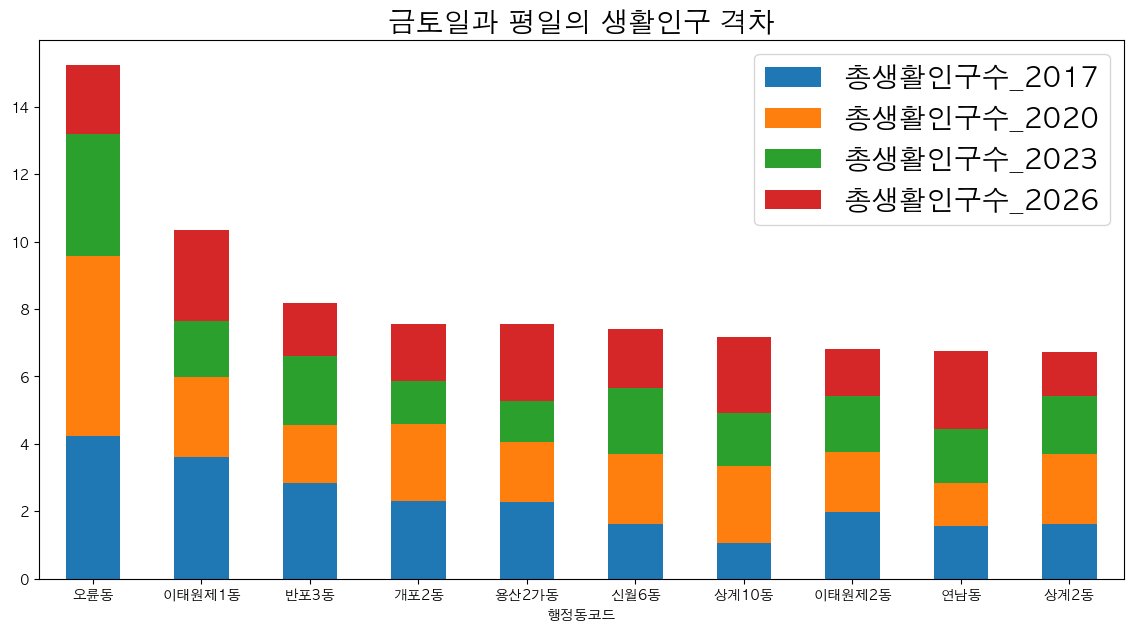

In [18]:
df_tot.sort_values('sum',ascending=False).head(10).iloc[:,:-1].plot(kind='bar', stacked=True,figsize=(14,7))
plt.xticks(rotation=0)
plt.title('금토일과 평일의 생활인구 격차',fontsize=20)
plt.legend(fontsize=20)
plt.show()